# Categorical Encoding analisis
El presente analisis busca evaluar el efecto de diferentes tecnicas de encoding sobre el performance de modelos de aprendizaje de maquina. El presente analisis no se enfoca en tecnicas de preprocesamiento avanzadas como imputacion de faltantes o seleccion de atributos mediante metodos de filtrado o wrapper. Por otro lado, es posible utilizar seleccion de variable siempre que los metodos se encuentren embebidos dentro del algoritmo de aprendizaje automatico.

Los datos a utilizar seran los de la tabla *heart decease* que se encuentran dentro del repositorio de Machine learning de UC Irvine, los cuales pueden ser consultados en la pagina https://archive.ics.uci.edu/dataset/45/heart+disease. Esta investigacion busca determinar los factores asociados a enfermedades cardiacas en diferentes pacientes. Originalmente se utilizaron 76 variables para esta investigacion, sin embargo, solo se hicieron publicas 14 descritas a continuacion:

- age: edad
- sex: Genero
- cp: tipo de dolor de pecho
- trestbps: presion arterial en reposo
- chol: nivel de colesterol
- fbs: azucar en sangre mayor que 120 mg/dl
- restecg: nivel de electrocardiograma en reposo
- thalach: maximo nivel de presion arterial alcanzado
- exang: angina inducida por ejercicio
- oldpeak: 
- slope: 
- ca
- thal
- num: variable respuesta


## 1. Exploracion de los datos
En esta seccion se hara una breve exploracion de los datos elegidos para el analsis en terminos de calidad de datos, es decir, se verificara si existan datos faltantes, si existen datos atipicos asi como el tipo de sus variables. En segundo lugar, se analizaran las variables cualitativas de los datos y en terminos del numero de niveles que contiene cada una de ellas y si son cualitativas nominales u ordinales.

In [84]:
# Importando librerias
from ucimlrepo import fetch_ucirepo 
import polars as pl
from sklearn.model_selection import train_test_split
import seaborn as sns

In [89]:
# Configuracion de graficos
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.set(rc={"figure.figsize":(3, 3.5)})

In [55]:
# Importando data
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets.num
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


In [64]:
# Dividiendo en train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=567)
Xtrain, Xtest = pl.from_pandas(Xtrain), pl.from_pandas(Xtest)
ytrain, ytest = pl.Series(ytrain), pl.Series(ytest)
Xtrain.head()

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,i64,f64,f64
48,0,3,130,275,0,0,139,0,0.2,1,0.0,3.0
52,1,3,138,223,0,0,169,0,0.0,1,null,3.0
59,1,3,126,218,1,0,134,0,2.2,2,1.0,6.0
49,0,2,134,271,0,0,162,0,0.0,2,0.0,3.0
53,1,4,142,226,0,2,111,1,0.0,1,0.0,7.0


In [69]:
# Variable respuesta
ytrain.value_counts()

num,count
i64,u32
4,9
2,24
3,33
0,123
1,38


Se observa que la variable respuesta tiene 5 niveles, esto hace referencia a diferentes tipos de enfermedades cardiacas, sin embargo, se procederá a codificar dichas variables en solo 2 niveles: 0 no tiene enfermedad cardiaca, 1 tiene cualquier tipo de enfermedad.

<Axes: xlabel='num', ylabel='count'>

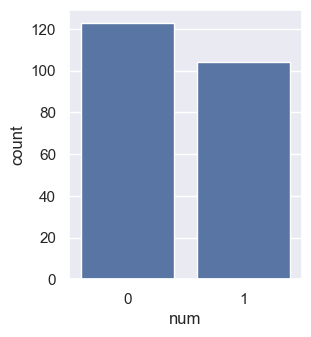

In [90]:
# Codificando nueva respuesta
ytrain = ytrain.replace([0, 1, 2, 3, 4], [0, 1, 1, 1, 1])
ytest = ytest.replace([0, 1, 2, 3, 4], [0, 1, 1, 1, 1])
sns.barplot(data=ytrain.value_counts().lazy().collect(), x='num', y='count')


Luego del cambio en la codificacion se puede observar que los datos de la variable respuesta estan distribuidos de forma relativamente igual, por lo tanto no se hara necesario usar ningun metodo de balanceo.

<Axes: >

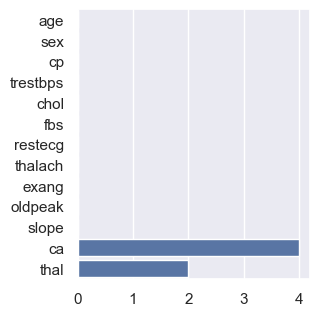

In [91]:
# Describiendo data
missingValues = Xtrain.select(pl.all().is_null().sum())
sns.barplot(y=missingValues.columns, x=missingValues[0].to_numpy().reshape((-1, )))

En primer lugar, se observa que las variables CA y Thal contienen valores faltantes, lo cual indica que se debe realizar algun metodo de imputacion, sin embargo, no existe una gran cantidad de registros con estos valores.

In [66]:
# Valores unicos
Xtrain.select(pl.all().n_unique())

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
40,2,4,45,130,2,3,85,2,38,3,5,4


Se observa que las variables Sex, CP, fbs, restecg, exang, slope CA y Thal tienen pocos valores unicos, es decir, podriamos asociarlas a variables cualitativas. Esto quiere decir que para las variables CA y THAL se debe imputar sus valores por moda o un metodo similar.